## XGBoost (eXtra Gradient Boost)

### XGBoost 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제
- 가지치기(pruning)
- 교차 검증 내장
- 결측값 자체 처리


뛰어난 예측 성능
- 일반적으로 분류와 회귀 영역에서 뛰어난 예측성능

In [1]:
import xgboost

print(xgboost.__version__)

0.90


## [예제] 위스콘신 유방암 예측

### (1) 파이썬 래퍼 XGBoost 적용

In [7]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset= load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [8]:
# 데이터 확인하기 위해 데이터 프레임으로 설정
cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)

# 맨 마지막에 target 추가
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())
#악성 :'malignant' : 0
#양성 : 'benign' : 1

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2,random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


#### 학습과 예측 데이터 세트를 `DMatrix`로 변환
- DMatrix : XGBoost 전용 데이터 세트

In [12]:
# 파이썬 xgboost를 사용하려면 DMatrix타입으로 변화해야한다.
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

하이퍼 파라미터 설정

In [13]:
params = {
    'max_depth':3,               # 최대 깊이 : 3
    'eta' : 0.1,                  # 학습률 : 0.1
    'objective': 'binary:logistic', # 분류형태 : 이진분류
    'eval_metric' : 'logloss'      # 평가합수 : logloss
    }
num_rounds = 400                  # 400번 반복

지정한 파라미터로 모델 학습

In [15]:
wlist = [(dtrain,'train'),(dtest,'eval')]  

xgb_model = xgb.train(params = params, dtrain=dtrain, 
                      num_boost_round=num_rounds,
                     early_stopping_rounds=100,
                      evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321221	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

#### 결과
- train()으로 학습 수행
- 400번 반복하면서 logloss 값이 계속 감속
- 211이후 100번 더 반복 동안 성능 평가 지수가 향상되지 못해서 학습 종료

In [17]:
# 예측 수행 : 예측 확률값 반환
pred_probs = xgb_model.predict(dtest)
print('결과값을 10개만 표시, 예측 확률 값으로 표시')
print(np.round(pred_probs[:10],3),'\n')

preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 :', preds[:10])

결과값을 10개만 표시, 예측 확률 값으로 표시
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ] 

예측값 10개만 표시 : [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


#### 예측된 것으로 모델 평가 진행

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
 F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [27]:
# 테스트 실제 레이블 값을 가지는 y_test와
# 예측 레이블인 preds 인자
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


#### xgboost 패키지에 내장된 시각화 기능 이용 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

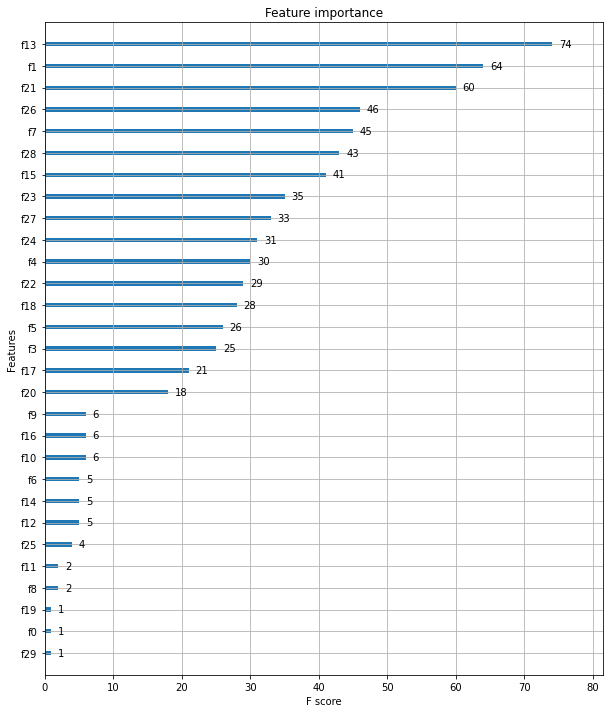

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12)) # 축반환
plot_importance(xgb_model,ax=ax) #학습이 된 xgb_model과 축

# F-score

graphviz를 이용하여 XGBoost 모델 트리 시각화

In [29]:
# from sklearn.tree import export_graphviz
# xgboost.to_graphviz(xgb_model, size='8.8')

### 파이썬 래퍼 XGBoost 교차검증 수행 API: cv()
: xgboost는 사이킷런의 GridSearchCV와 유사하게 cv()를 API로 제공

---

## (2) 사이킷런의 XGBoost

In [34]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# 학습과 예측 수행 : fit(), predict(), predict_proba()이용
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400,
           eval_set=evals, eval_metric="logloss",verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

# 결과
# validation_0-logloss 값이 계속 적어짐
# n_estimator로 설정한 400이 끝나면 종료

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [36]:
get_clf_eval(y_test, w_preds, w_preds_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC:0.9951


---

early stopping을 100으로 설정하고 재 학습/예측/평가

In [38]:
from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# 학습과 예측 수행 : fit(), predict(), predict_proba()이용
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
           eval_set=evals, eval_metric="logloss",verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

# 결과
# validation_0-logloss 값이 계속 적어짐
# n_estimator로 설정한 400이 끝나면 종료

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [39]:
get_clf_eval(y_test, ws100_preds, ws100_preds_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC:0.9954


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

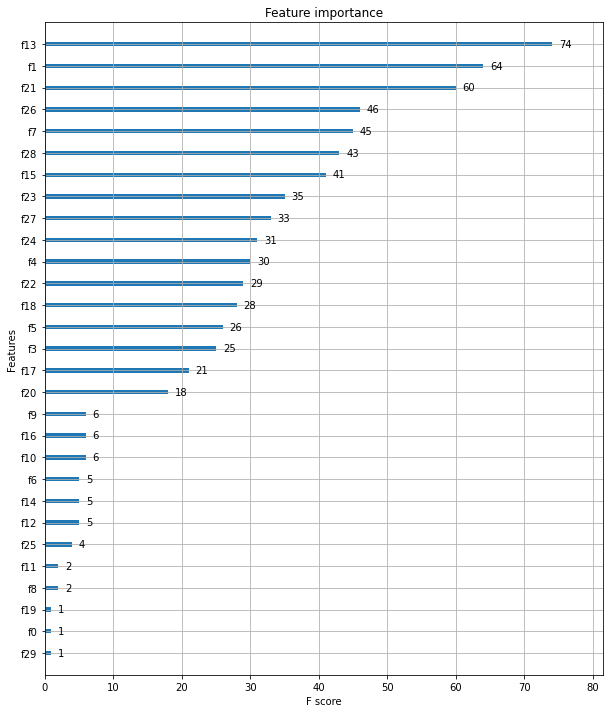

In [40]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12)) # 축반환
plot_importance(xgb_wrapper,ax=ax) #학습이 된 xgb_model과 축

# F-score